In [15]:
import random

In [16]:
import collections #we need collections.abc which provides abstract base classes that can be used to test whether a class provides a particular interface

In [17]:
#This base class represents ANY physical object that can appear in an Environment.
class Thing:

  def __repr__(self):
    """Return a string representation of this Thing (as script name or class name)"""
    return '<{}>'.format(getattr(self, '__name__', self.__class__.__name__))

  def is_alive(self):
    """Things that are 'alive' should return true."""
    return hasattr(self, 'alive') and self.alive

    def show_state(self):
      """Display the agent's internal state. Subclasses should override."""
      print("I don't know how to show_state.")

In [26]:
#This subclass of a base Thing class represents an Agent
'''It has one required slot (attribute), .program, which reperesents Agent Program (the Core of Agent's logic).
Agent Program should hold a function that takes one argument, the Percept, and returns an action.'''

'''!!! Note that '.program' is a slot, not a method.
If it were a method, then the program could 'cheat' and look at aspects of the agent.
It's not supposed to do that: the program can only look at the percepts'''

'''
There is an optional slot, .performance, which is a number giving
the performance measure of the agent in its environment.'''

class Agent(Thing):

    def __init__(self, program=None):
        self.alive = True
        self.performance = 0
        self.location=None

        if program is None or not isinstance(program, collections.abc.Callable):
            print("Can't find a valid program for {}, falling back to default.".format(self.__class__.__name__))

            def program(percept):
                return eval(input('Percept={}; action? '.format(percept)))

        self.program = program


In [19]:
'''An idea of Random Agent Program is to choose an action at random, ignoring all percepts'''

'''
>>> list = ['Right', 'Left', 'Suck', 'NoOp']
    >>> program = RandomAgentProgram(list)
    >>> agent = Agent(program)
    >>> environment = TrivialVacuumEnvironment()
    >>> environment.add_thing(agent)
    >>> environment.run()
    >>> environment.status == {(1, 0): 'Clean' , (0, 0): 'Clean'}
    True
'''

def RandomAgentProgram(actions):
   return lambda percept: random.choice(actions)

In [20]:
actionList = ['Right', 'Left', 'Suck', 'NoOp']
f=RandomAgentProgram(actionList)
for i in range(5):
    print(f('111'))


Left
Right
Left
Right
Suck


In [21]:
'''Randomly choose one of the actions from the vacuum environment'''
def RandomVacuumAgent():
    return Agent(RandomAgentProgram(actionList))

In [22]:
a1=RandomVacuumAgent()
print(a1)
for i in range(5):
  print(a1.program('111'))

<Agent>
Suck
Left
Suck
Left
Right


In [118]:
'''
A base class representing an abstract Environment.
'Real' Environment classes must inherit from this one.
The environment keeps a list of .agents.
Each agent has a .performance slot, initialized to 0.
'''
class Environment:
  def __init__(self):
    self.agents = []

  def percept(self, agent):
    #Return the percept that the agent sees at this point. (Implement this in derived classes)
    print("I don't know how to percept.")

  def execute_action(self, agent, action):
    #Change the world to reflect this action. (Implement this in derived classes)
    print("I don't know how to execute_action.")

  def default_location(self, thing):
    #Default location to place a new thing with unspecified location.
    return None

  def is_done(self):
    #By default, we're done when we can't find a live agent.
    return not any(agent.is_alive() for agent in self.agents)

  def step(self):
        #Run the environment for one time step.
        if not self.is_done():
            actions = []
            for agent in self.agents:
                if agent.alive:
                    action=agent.program(self.percept(agent))
                    print("Agent percepted {}.".format(self.percept(agent)))
                    print("Agent decided to do {}.".format(action))
                    actions.append(action)
                else:
                    actions.append("")
            for (agent, action) in zip(self.agents, actions):
                self.execute_action(agent, action)

  def run(self, steps=10):
        #Run the Environment for given number of time steps.
        for step in range(steps):
            if self.is_done():
                return
            print("step {0}:".format(step+1))
            self.step()

  def add_thing(self, thing, location=None):
    if thing in self.agents:
      print("Can't add the same agent twice")
    else:
      if isinstance(thing, Agent):
        thing.performance = 0
        thing.location = location if location is not None else self.default_location(thing)
        self.agents.append(thing)

  def delete_thing(self, thing):
    if thing in self.agents:
      self.agents.remove(thing)



In [24]:
#TrivialVacuumEnvironment has two locations, A and B
# These are the two locations for the two-state environment
loc_A, loc_B = (0, 0), (1, 0)

In [60]:
'''This environment has two locations, A and B. Each can be Dirty
    or Clean. The agent perceives its location and the location's
    status. This serves as an example of how to implement a simple
    Environment.
'''
class TrivialVacuumEnvironment(Environment):
  def __init__(self):
    super().__init__()
    self.status = {loc_A: random.choice(['Clean', 'Dirty']),
                   loc_B: random.choice(['Clean', 'Dirty'])}

  def percept(self, agent):
    #Returns the agent's location, and the location status (Dirty/Clean).
    return agent.location, self.status[agent.location]

  def execute_action(self, agent, action):
        """Change agent's location and/or location's status;
        Track performance.
        Score 10 for each dirt cleaned; -1 for each move."""
        if action == 'Right':
            agent.location = loc_B
            agent.performance -= 1
        elif action == 'Left':
            agent.location = loc_A
            agent.performance -= 1
        elif action == 'Suck':
            if self.status[agent.location] == 'Dirty':
                agent.performance += 10
            self.status[agent.location] = 'Clean'

  def default_location(self, thing):
        """Agents start in either location at random."""
        return random.choice([loc_A, loc_B])

In [66]:
e1 = TrivialVacuumEnvironment()
# Check the initial state of the environment
print("State of the Environment: {}.".format(e1.status))

State of the Environment: {(0, 0): 'Dirty', (1, 0): 'Clean'}.


In [67]:
'''Create our agent now.
This agent will choose any of the actions from 'Right', 'Left', 'Suck' and 'NoOp' (No Operation) randomly.'''
a1=RandomVacuumAgent()
a1

<Agent>

In [68]:
#add our agent to the environment.
e1.add_thing(a1)

In [69]:
print("RandomVacuumAgent is located at {}.".format(a1.location))

RandomVacuumAgent is located at (0, 0).


In [71]:
# Running the environment for 1 step
e1.step()

# Check the current state of the environment
print("State of the Environment: {}.".format(e1.status))

print("RandomVacuumAgent is located at {}.".format(a1.location))

Agent percepted ((0, 0), 'Dirty').
Agent decided to do Suck.
State of the Environment: {(0, 0): 'Clean', (1, 0): 'Clean'}.
RandomVacuumAgent is located at (0, 0).


In [72]:
#Running the environment for the lifecircle
e1.run()

Agent percepted ((0, 0), 'Clean').
Agent decided to do Right.
Agent percepted ((1, 0), 'Clean').
Agent decided to do Suck.
Agent percepted ((1, 0), 'Clean').
Agent decided to do NoOp.
Agent percepted ((1, 0), 'Clean').
Agent decided to do Left.
Agent percepted ((0, 0), 'Clean').
Agent decided to do Right.
Agent percepted ((1, 0), 'Clean').
Agent decided to do Left.
Agent percepted ((0, 0), 'Clean').
Agent decided to do Left.
Agent percepted ((0, 0), 'Clean').
Agent decided to do NoOp.
Agent percepted ((0, 0), 'Clean').
Agent decided to do NoOp.
Agent percepted ((0, 0), 'Clean').
Agent decided to do Left.


In [73]:
e1.status == {(1,0):'Clean' , (0,0) : 'Clean'}

True

In [74]:
#prev.version of our random agent is almost immortal :))
a1.performance


4

In [109]:
#If the agent's perfomance <=0 --> agent is not alive and can't do anything'''

class TrivialVacuumEnvironment2(Environment):
  def __init__(self):
    super().__init__()
    self.status = {loc_A: random.choice(['Clean', 'Dirty']),
                   loc_B: random.choice(['Clean', 'Dirty'])}

  def percept(self, agent):
    #Returns the agent's location, and the location status (Dirty/Clean).
    return agent.location, self.status[agent.location]

  def is_agent_alive(self, agent):
    return agent.alive

  def update_agent_alive(self, agent):
    if agent.performance <= 0:
      agent.alive = False
      print("Agent {} is dead.".format(agent))

  def execute_action(self, agent, action):
    '''Check if agent alive, if so, execute action'''
    if self.is_agent_alive(agent):
        """Change agent's location and/or location's status;
        Track performance.
        Score 10 for each dirt cleaned; -1 for each move."""

        if action == 'Right':
            agent.location = loc_B
            agent.performance -= 1
            self.update_agent_alive(agent)
        elif action == 'Left':
            agent.location = loc_A
            agent.performance -= 1
            self.update_agent_alive(agent)
        elif action == 'Suck':
            if self.status[agent.location] == 'Dirty':
                agent.performance += 10
            self.status[agent.location] = 'Clean'

  def default_location(self, thing):
        """Agents start in either location at random."""
        return random.choice([loc_A, loc_B])

In [113]:
loc_A, loc_B = (0, 0), (1, 0)
e2=TrivialVacuumEnvironment2()

a1=RandomVacuumAgent()

e2.add_thing(a1)

print("State of the Environment: {}.".format(e2.status))
print("RandomVacuumAgent is located at {}.".format(a1.location))

State of the Environment: {(0, 0): 'Clean', (1, 0): 'Dirty'}.
RandomVacuumAgent is located at (1, 0).


In [114]:
e2.run()

Agent percepted ((1, 0), 'Dirty').
Agent decided to do Right.
Agent <Agent> is dead.


In [115]:
e2.status == {(1,0):'Clean' , (0,0) : 'Clean'}

False

In [116]:
e2.status

{(0, 0): 'Clean', (1, 0): 'Dirty'}

In [117]:
a1.performance

-1

**Task 1:**
1. Implement the class Dirt
2. Change the class TrivialVacuumEnvironment2 (and its base class if it is required) to provide the following:
* keeping a list of things in the env
* adding the thing in random location
* output the list of things with their locations
* removing the thing from the env
* the status of the env is unknown **

** delete the following code fragment from the class TrivialVacuumEnvironment2

*self.status = {loc_A: random.choice(['Clean', 'Dirty']),
                   loc_B: random.choice(['Clean', 'Dirty'])}*

the status of the env is perceived by agent and set to 'Dirty' if the thing Dirt is in the current (during the preceiving process) agent's location


**Task 2:**

By using the *Agent* class creating your first **random** agent - a radom operating *Cat*.

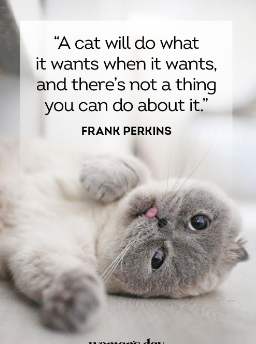

Available actions: MoveRight, MoveLeft, Eat, Drink, Fight



The cat will do whatever it wants (based on its random choice) regardless of its location and what is there.


The house has 5 rooms, arranged in a row.

There are 3 things in the house: a Mouse, Milk, and a Dog.

The things are placed randomly.

But if (by acident) a Mouse and Milk are placed in the same room, only a Mouse will stay there (since it will drink a Milk - the process of 'drinking milk by a mouse is not supposed to be implemented in this task'), so you will have 2 things instead of 3 in the House.

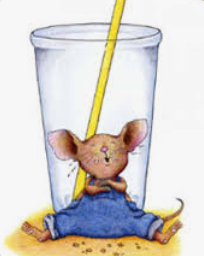

If a Mouse and a Dog are in the same room, the Mouse is needed to be moved to the previos or next room (prev. or next - select randomly).

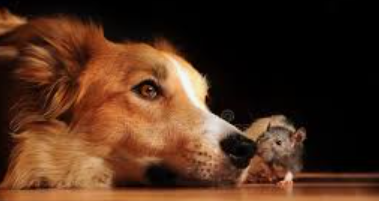


A Dog and Milk can be in the same room.
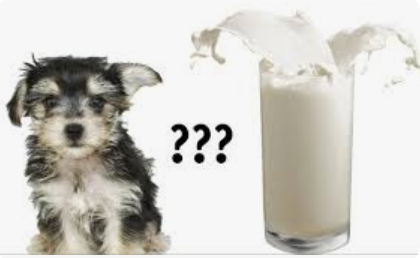

Create the Crazy House environment. Place things accordingly to the rule above.

Place the Cat in the random room.

If the Cat drinks milk, the performance will be increased by 5.

If the Cat eats a Mouse, the performance will be increased by 10.
But to eat a Mouse the Cat must catch it. Only strong Cat can do that. If the performance < 3 the Cat is weak and can't catch a Mouse while in the same room with it (the performance doesn't change in this case).

Each movement -> perfomace -1

If the Cat fights a Dog and wins (only super strong Cat, with performance>=10, can do that) the performance will be increased by 20.
Otherwise a Dog wins and a Cat loose its strength (perfomace -10).

If the perfomace <=0 ....see above...GAME OVER!


Run the Crazy House ⚡ 💯

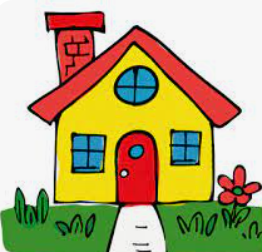

